In [1]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [13]:
import pandas as pd 
df=pd.read_csv('imdb_top_1000.csv', encoding='utf8')
df['Runtime']=df['Runtime'].str.replace('min','') #remove column
df = df.dropna(subset=["Certificate"]) #dropnNaN because was affecting conversion to int
df['Runtime'] = df['Runtime'].astype(int) #convert to int
df.sort_values(["Released_Year"], 
                    axis=0,
                    ascending=[True], 
                    inplace=True)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,"5,450,000"
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,"977,375"
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,"5,450,000"
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,"1,033,895"
319,https://m.media-amazon.com/images/M/MV5BNDVkYm...,Sunrise: A Song of Two Humans,1927,Passed,94,"Drama, Romance",8.1,An allegorical tale about a man fighting the g...,NaN,F.W. Murnau,George O'Brien,Janet Gaynor,Margaret Livingston,Bodil Rosing,46865,"539,540"


In [14]:
#attempting to group dataset by year and calculate average gross per year following these instructions https://towardsdatascience.com/data-grouping-in-python-d64f1203f8d3

df['AVG_Runtime'] = df.groupby('Certificate').Runtime.transform('mean')
df.head(8)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,AVG_Runtime
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,"5,450,000",106.205882
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,"977,375",106.205882
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,"5,450,000",106.205882
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,"1,033,895",106.205882
319,https://m.media-amazon.com/images/M/MV5BNDVkYm...,Sunrise: A Song of Two Humans,1927,Passed,94,"Drama, Romance",8.1,An allegorical tale about a man fighting the g...,NaN,F.W. Murnau,George O'Brien,Janet Gaynor,Margaret Livingston,Bodil Rosing,46865,"539,540",106.205882
318,https://m.media-amazon.com/images/M/MV5BM2QwYW...,The Circus,1928,Passed,72,"Comedy, Romance",8.1,The Tramp finds work and the girl of his dream...,90.0,Charles Chaplin,Charles Chaplin,Merna Kennedy,Al Ernest Garcia,Harry Crocker,30205,NaN,106.205882
317,https://m.media-amazon.com/images/M/MV5BNjBjND...,La passion de Jeanne d'Arc,1928,Passed,110,"Biography, Drama, History",8.1,"In 1431, Jeanne d'Arc is placed on trial on ch...",NaN,Carl Theodor Dreyer,Maria Falconetti,Eugene Silvain,André Berley,Maurice Schutz,47676,"21,877",106.205882
461,https://m.media-amazon.com/images/M/MV5BMzg2MW...,All Quiet on the Western Front,1930,U,152,"Drama, War",8.0,"A German youth eagerly enters World War I, but...",91.0,Lewis Milestone,Lew Ayres,Louis Wolheim,John Wray,Arnold Lucy,57318,"3,270,000",124.158120


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

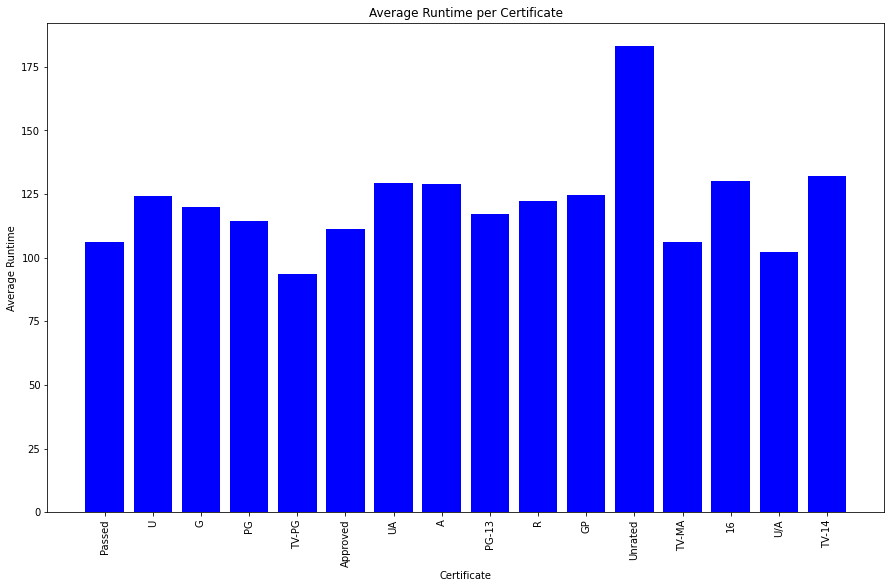

In [25]:
fig, ax = plt.subplots(figsize=(15,9))
ax.bar(df["Certificate"], df["AVG_Runtime"], color="blue")
plt.title("Average Runtime per Certificate") 
plt.xlabel("Certificate")
plt.ylabel("Average Runtime") 
plt.xticks(rotation = 90)
plt.show() 
